# Principal Component Analysis of the Handwritten Digits Data-set

* Dimensionality Reduction:
    * Principal Component analysis
    * Linear Algebra
    * Lots of examples

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [23]:
from sklearn.datasets import load_digits

In [24]:
digits = load_digits()

In [25]:
digits.data.shape

(1797L, 64L)

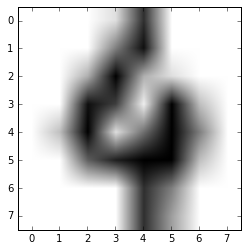

In [26]:
plt.imshow(digits.images[100,:,:],cmap='binary');

#### Instantiate a PCA object

We'll import the module PCA, which stands for 'Principal Component Analysis'
Principal component analysis projects data onto orthogonal components in the feature space (R2 in the plot) in such a way that each component embodies the maximum amount of variance. In what follows we'll apply the PCA to the digits dataset

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2) # Choose two components to have a 2D plot

#### Compute the principal components

In [29]:
pca.fit(digits.data)

PCA(copy=True, n_components=2, whiten=False)

The called model has computed the 2 principal components -- the vectors in feature space. Each of these vectors denotes an 8 by 8 pixel image. We can access an individual component by means of the .components_attribute

In [30]:
pca.components_.shape

(2L, 64L)

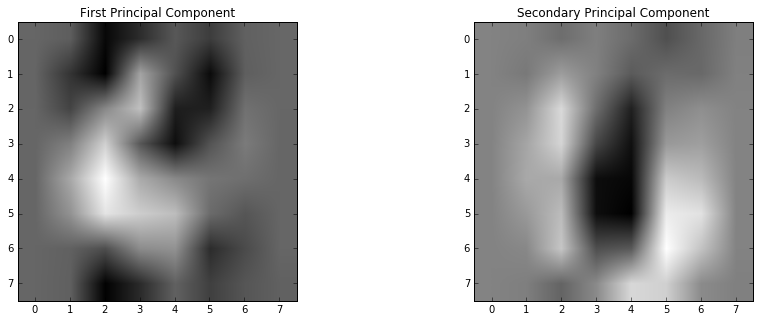

In [31]:
p1 = pca.components_[0,:] # Call the first principal component
p2 = pca.components_[1,:] # Call the second principal component
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(p1.reshape(8,8),cmap='binary'), plt.title('First Principal Component')
plt.subplot(1,2,2)
plt.imshow(p2.reshape(8,8),cmap='binary'), plt.title('Secondary Principal Component');

What the above figure demonstrates is that our PCA object is equipped to project each image onto these two principal components. By examining these two principal components, we can discern that the best 2D representation of the dataset is the result of the extent to which a digit looks like 3 and the extent to which it looks like a 0.

* Is it maybe that the black stuff is what the digits looks like and the white stuff is what the digit is? What does the gradient denote?
* It also seems like the pca.fit inverted the color scheme. Is this because it's easier to model the null hypothesis?

####  Visualizing the digits dataset

Moving on, we apply the .transform method for the whole dataset and plot the result.

In [11]:
digits_2D = pca.transform(digits.data)

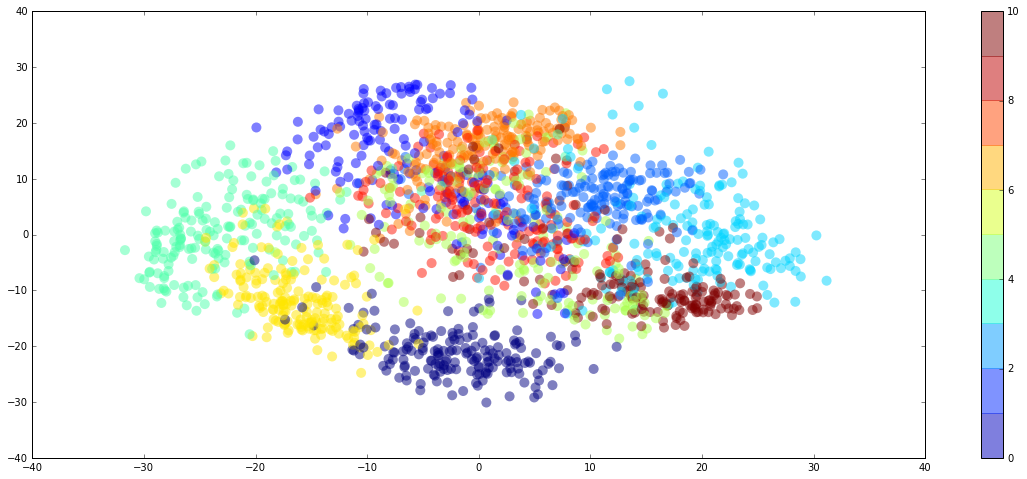

In [12]:
plt.figure(figsize=(20,8))
plt.scatter(digits_2D[:,0],digits_2D[:,1],c=digits.target,s=100,alpha=0.5,lw=0);
plt.colorbar(boundaries=range(0,11));

Notice that all the 3s lie on the left half of the plot. This is because the first principal component denotes a 3 **with inverted colors**. Similarly, the 0's are at the bottom half because the second principal ocmponent is a 0 **with the colors inverted**

#### When is 5 equal to 8?

In what follows the PCA is to be applied to the set of 5s and 8s to see their separation in feature space.

In [13]:
fives = digits.data[digits.target == 5]
eights = digits.data[digits.target == 8]

In [14]:
pca2 = PCA(n_components=2) # Instantitate a new PCA model with 2 components

In [15]:
fives_eights = np.vstack((fives,eights)) # collect all 5s and 8s in a sintle array
fives_eights_2D = pca.fit_transform(fives_eights) # Fit and transform the 5s and 8s into a 2D array

In [16]:
fives_eights_targets = np.array([0 for _ in fives] + [1 for _ in eights]) # Hack together the labels for 5s and 8s

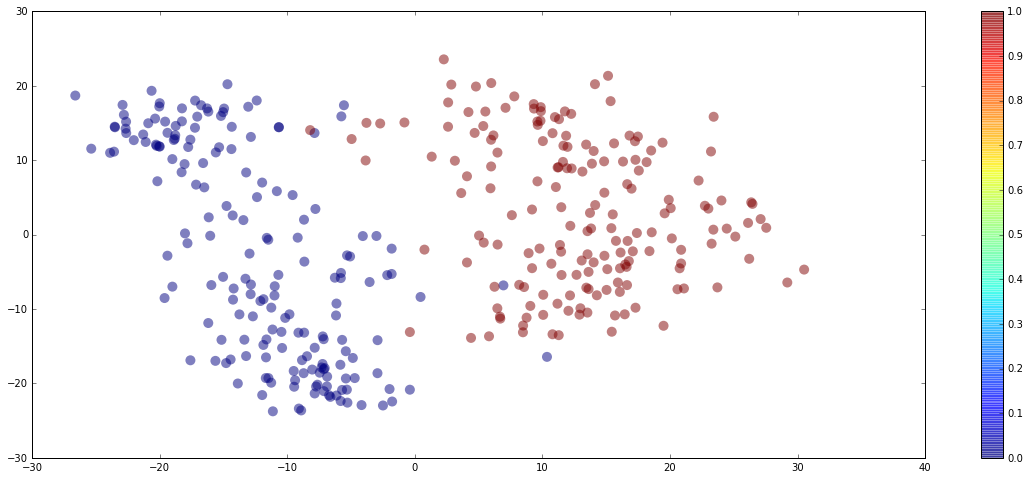

In [17]:
plt.figure(figsize=(20,8))
plt.scatter(fives_eights_2D[:,0],fives_eights_2D[:,1],c=fives_eights_targets,s=100,alpha=0.5,lw=0);
plt.colorbar();

## Analyze the principal component analysis by linear algebra

The goal of a [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) is to find the vectores in the feature space which can capture the most variance in the data set:
![pca](https://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg)

#### Step 1. Normalize the data

The computation begins by normalizing the features so that they all have a mean of 0.

In [7]:
X = np.matrix(digits.data) - np.mean(digits.data,axis=0)

#### Step 2: Maximize the variance with eigenvectors (corresponding to maximum eigenvalues)

In what follows, the data is to be projected onto a single vector $w$. Given our dataset $X$ with $n$ rows (samples) and $p$ columns (features), then the **sum of the squares of the norms of the projections of the samples onto a unit (column) vector $w$ (of length $p$) is** given by

$$ \begin{align}
\lVert X_w \rVert = w^TX^TXw .
\end{align}
$$
To this end, the quantity to be maximized is

$$ \begin{align}
w^TX^TXw
\end{align}
$$

for a unit vector $w$. Since the matrix $X^TX$ is [symmetric](https://en.wikipedia.org/wiki/Symmetric_matrix), the result to this problem is given by the [min-max theorem](https://en.wikipedia.org/wiki/Min-max_theorem). As such, the aforementioned quantity is maximized whenever $w$ is the **unit eigenvector of $X^TX$ with maximum eigenvalue.**


#### Step 3: Compute eigenvectors and plot the principal components

Let's obtain manually the 2 eigenvectors of $X^TX$ with 2 largest eigenvalues

In [8]:
A = X.T * X

In [9]:
evals, evecs = np.linalg.eig(A)

Eigenvectors are returned in order from highest to lowest eigenvalue. We'll plot the 2 principal components and compare this to the result from sklearn's PCA object.

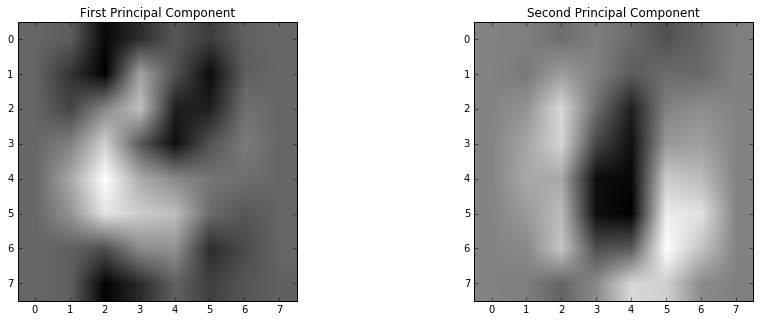

In [17]:
P1 = evecs[:,0]
P2 = evecs[:,1]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(P1.reshape(8,8),cmap='binary'), plt.title('First Principal Component')
plt.subplot(1,2,2)
plt.imshow(P2.reshape(8,8),cmap='binary'), plt.title('Second Principal Component');

We can easily verify that these images are identical to the principal components computed by sklearn's PCA object. We can verify this by computing the distance between the principal components that we obtained manually and the principal components computed by the PCA object:

In [32]:
np.linalg.norm(P1 - p1.reshape(64,1))

1.3971430385693514e-14

In [33]:
np.linalg.norm(P2 - p2.reshape(64,1))

1.2367852296335491e-14

Comparing this to [machine epsilon](https://en.wikipedia.org/wiki/Machine_epsilon#Formal_definition), we find that it's prety fucking small compared to $\epsilon$.